# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [49]:
!pip install -q kaggle

In [50]:
!pip install pandas

In [51]:
!pip install matplotlib

In [52]:
!pip install numpy
!pip install seaborn



In [53]:
!pip install mlflow

In [54]:
!pip install nltk

In [55]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import re
import string
import nltk
import os
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krisn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krisn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [56]:
#Type your code here
#from google.colab import files
#files.upload()

In [57]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
#!ls ~/.kaggle

In [58]:
#!kaggle datasets download -d ivankmk/thousand-ml-jobs-in-usa


In [59]:
# unzip
#!mkdir thousand-ml-jobs-in-usa
#!unzip -qq thousand-ml-jobs-in-usa -d ml-jobs
#!ls ml-jobs

In [60]:
#!ls ml-jobs/1000_ml_jobs_us.csv/

In [61]:
data = pd.read_csv('../dataset/1000_ml_jobs_us.csv')
data.head()

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [62]:

array = np.asarray([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
dataset = mlflow.data.from_numpy(array, source="1000_ml_jobs_us.csv")
 
with mlflow.start_run():
    mlflow.log_input(dataset, context="training")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [63]:
# Dimensi dan info umum
print("Shape:", data.shape)
print("\nInfo:")
data.info()




Shape: (997, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                997 non-null    int64 
 1   job_posted_date           997 non-null    object
 2   company_address_locality  950 non-null    object
 3   company_address_region    884 non-null    object
 4   company_name              997 non-null    object
 5   company_website           983 non-null    object
 6   company_description       985 non-null    object
 7   job_description_text      996 non-null    object
 8   seniority_level           988 non-null    object
 9   job_title                 997 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.0+ KB


In [64]:
# Cek missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
company_address_region,113,11.334002
company_address_locality,47,4.714142
company_website,14,1.404213
company_description,12,1.203611
seniority_level,9,0.902708
job_description_text,1,0.100301


In [65]:
# Duplikat
print("Jumlah duplikat:", data.duplicated().sum())
# Jika ingin menghapus:
# data = data.drop_duplicates()


Jumlah duplikat: 0


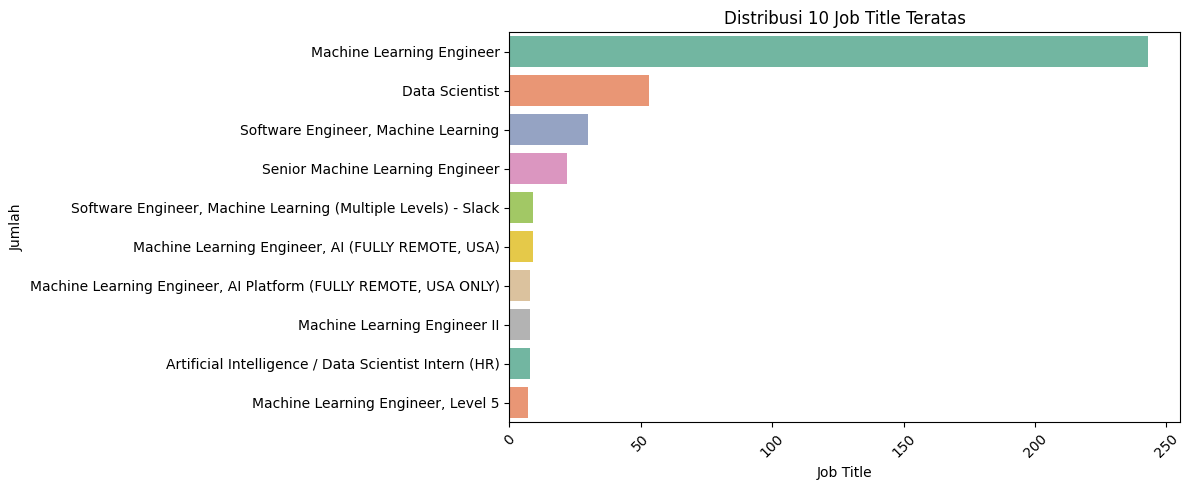

Jumlah unique job title: 450
Job title terbanyak:
 job_title
Machine Learning Engineer                                        243
Data Scientist                                                    53
Software Engineer, Machine Learning                               30
Senior Machine Learning Engineer                                  22
Software Engineer, Machine Learning (Multiple Levels) - Slack      9
Name: count, dtype: int64


In [66]:
plt.figure(figsize=(12, 5))
sns.countplot(data['job_title'], order=data['job_title'].value_counts().index[:10], palette='Set2')
plt.title("Distribusi 10 Job Title Teratas")
plt.xlabel("Job Title")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Jumlah unique job title:", data['job_title'].nunique())
print("Job title terbanyak:\n", data['job_title'].value_counts().head())


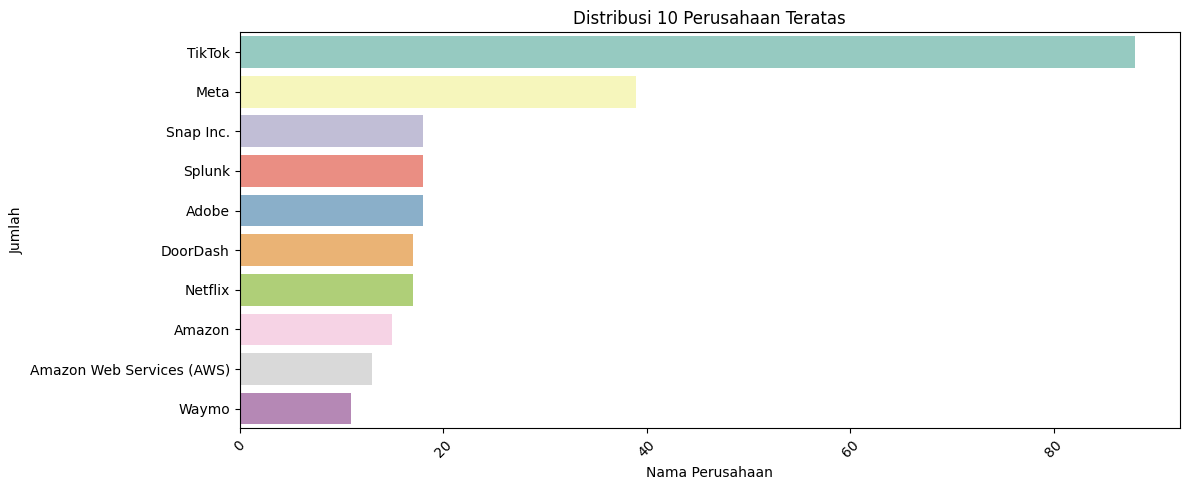

Jumlah unique company_name: 488
Perusahaan terbanyak:
 company_name
TikTok       88
Meta         39
Snap Inc.    18
Splunk       18
Adobe        18
Name: count, dtype: int64


In [67]:
plt.figure(figsize=(12, 5))
sns.countplot(data['company_name'], order=data['company_name'].value_counts().index[:10], palette='Set3')
plt.title("Distribusi 10 Perusahaan Teratas")
plt.xlabel("Nama Perusahaan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Jumlah unique company_name:", data['company_name'].nunique())
print("Perusahaan terbanyak:\n", data['company_name'].value_counts().head())


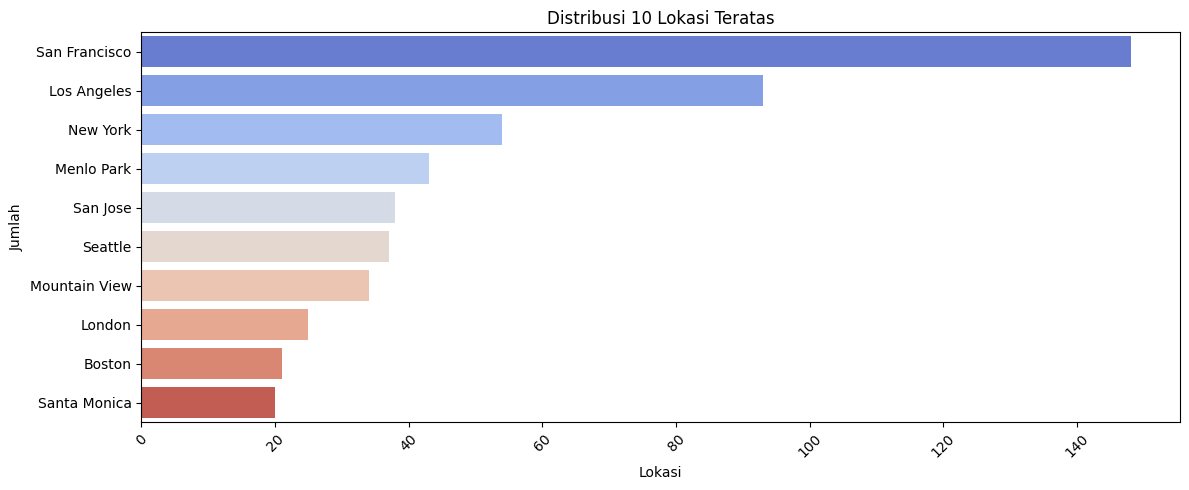

Jumlah unique lokasi: 178
Lokasi terbanyak:
 company_address_locality
San Francisco    148
Los Angeles       93
New York          54
Menlo Park        43
San Jose          38
Name: count, dtype: int64


In [68]:
plt.figure(figsize=(12, 5))
sns.countplot(data['company_address_locality'], order=data['company_address_locality'].value_counts().index[:10], palette='coolwarm')
plt.title("Distribusi 10 Lokasi Teratas")
plt.xlabel("Lokasi")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Jumlah unique lokasi:", data['company_address_locality'].nunique())
print("Lokasi terbanyak:\n", data['company_address_locality'].value_counts().head())


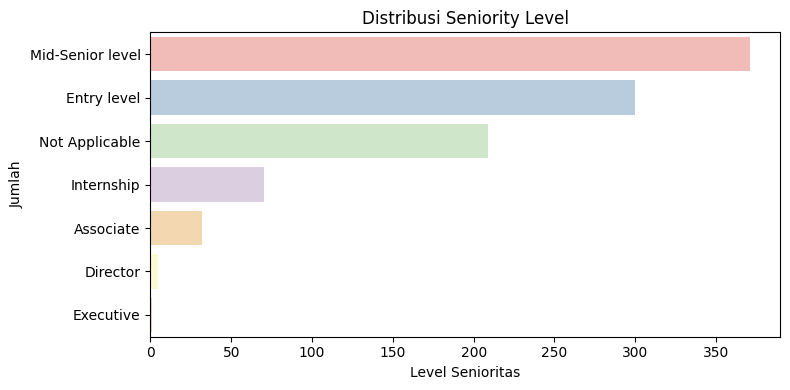

Jumlah unique seniority level: 7
Seniority level terbanyak:
 seniority_level
Mid-Senior level    371
Entry level         300
Not Applicable      209
Internship           70
Associate            32
Director              5
Executive             1
Name: count, dtype: int64


In [69]:
plt.figure(figsize=(8, 4))
sns.countplot(data['seniority_level'], order=data['seniority_level'].value_counts().index, palette='Pastel1')
plt.title("Distribusi Seniority Level")
plt.xlabel("Level Senioritas")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Jumlah unique seniority level:", data['seniority_level'].nunique())
print("Seniority level terbanyak:\n", data['seniority_level'].value_counts())


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [70]:
# Drop rows dengan missing pada kolom penting
data = data.dropna(subset=['job_title', 'job_description_text'])

# Isi missing values di kolom lain dengan 'unknown'
fill_cols = ['company_address_region', 'company_address_locality',
             'company_website', 'company_description', 'seniority_level']
data[fill_cols] = data[fill_cols].fillna('unknown')


In [71]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab') # Download the specific resource needed

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Terapkan pada kolom penting
data['job_title_clean'] = data['job_title'].apply(clean_text)
data['job_description_clean'] = data['job_description_text'].apply(clean_text)

# Jika ada kolom 'skills', bisa tambahkan:
if 'skills' in data.columns:
    data['skills_clean'] = data['skills'].fillna('').apply(clean_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krisn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [72]:
def combine_features(row):
    return f"{row['job_title_clean']} {row['job_description_clean']} {row.get('skills_clean', '')}"

data['combined_text'] = data.apply(combine_features, axis=1)


In [73]:
data[['job_title', 'job_title_clean', 'combined_text']].head()


,job_title,job_title_clean,combined_text
0,Internship - Machine Learning Engineer & Data ...,internship machine learning engineer data science,internship machine learning engineer data scie...
1,Machine Learning Engineer,machine learning engineer,machine learning engineer company descriptiont...
2,Machine Learning Engineer,machine learning engineer,machine learning engineer companychanging worl...
3,"Machine Learning Engineer, Training",machine learning engineer training,machine learning engineer training waymo auton...
4,Machine Learning Engineer,machine learning engineer,machine learning engineer job title machine le...


## Modeling

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Buat objek vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit dan transform teks
tfidf_matrix = tfidf.fit_transform(data['combined_text'])

print("Shape TF-IDF matrix:", tfidf_matrix.shape)


Shape TF-IDF matrix: (996, 5000)


In [75]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung kemiripan antar dokumen
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [76]:
# Reset index agar mapping bisa dilakukan dengan index
data = data.reset_index(drop=True)

# Fungsi rekomendasi berdasarkan judul
def recommend_jobs(job_title, top_n=5):
    # Cari indeks berdasarkan job title
    indices = data[data['job_title'].str.lower() == job_title.lower()].index

    if len(indices) == 0:
        return f"Tidak ditemukan job title: {job_title}"

    idx = indices[0]

    # Ambil skor similarity
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan berdasarkan skor tertinggi (kecuali diri sendiri)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Ambil indeks hasil rekomendasi
    job_indices = [i[0] for i in sim_scores]

    return data[['job_title', 'company_name', 'company_address_locality']].iloc[job_indices]


In [77]:
recommend_jobs("Data Engineer")


,job_title,company_name,company_address_locality
706,Machine Learning / ETL Engineer,Tata Consultancy Services,Mumbai
948,Machine Learning - ETL Engineer,Tata Consultancy Services,Mumbai
551,Machine Learning Engineer,CVS Health,Woonsocket
915,Senior Machine Learning Engineer,GoFundMe,Redwood City
448,AI/ML Data Engineer,BICP,San Diego


## Evaluation

In [78]:
"""## Evaluation"""

from sklearn.metrics import precision_score, recall_score, f1_score

# Fungsi untuk menentukan relevansi berdasarkan job_title
def is_relevant(actual_title, recommended_title):
    # Sederhana: anggap relevan jika kata kunci utama sama
    actual_words = set(actual_title.lower().split())
    recommended_words = set(recommended_title.lower().split())
    common_words = actual_words.intersection(recommended_words)
    # Anggap relevan jika ada setidaknya satu kata kunci utama yang sama
    return len(common_words) > 0

# Fungsi untuk evaluasi rekomendasi
def evaluate_recommendations(data, cosine_sim, top_n=5, sample_size=100):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Ambil sampel acak untuk evaluasi
    sample_indices = np.random.choice(data.index, size=min(sample_size, len(data)), replace=False)

    for idx in sample_indices:
        actual_title = data.iloc[idx]['job_title']

        # Ambil top-N rekomendasi
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        recommended_indices = [i[0] for i in sim_scores]
        recommended_titles = data.iloc[recommended_indices]['job_title'].values

        # Buat label relevansi
        y_true = [1] * top_n  # Asumsi awal semua relevan (akan diperbarui)
        y_pred = [1 if is_relevant(actual_title, rec_title) else 0 for rec_title in recommended_titles]

        # Ground truth: cari semua pekerjaan yang relevan di dataset
        relevant_jobs = data[data['job_title'].apply(lambda x: is_relevant(actual_title, x))].index
        relevant_count = len(relevant_jobs) - 1  # Kurangi 1 karena tidak termasuk diri sendiri

        if relevant_count == 0:
            continue  # Skip jika tidak ada pekerjaan relevan

        # Hitung precision, recall, f1
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = sum(y_pred) / relevant_count if relevant_count > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Rata-rata metrik
    avg_precision = np.mean(precision_scores) if precision_scores else 0
    avg_recall = np.mean(recall_scores) if recall_scores else 0
    avg_f1 = np.mean(f1_scores) if f1_scores else 0

    return {
        'Precision@{}'.format(top_n): avg_precision,
        'Recall@{}'.format(top_n): avg_recall,
        'F1-score@{}'.format(top_n): avg_f1
    }

# Jalankan evaluasi
evaluation_results = evaluate_recommendations(data, cosine_sim, top_n=5, sample_size=100)
print("Hasil Evaluasi:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")

Hasil Evaluasi:
Precision@5: 1.0000
Recall@5: 0.0077
F1-score@5: 0.0153


## Inference

In [79]:
"""## Inference"""

# Fungsi untuk inference berdasarkan input pengguna
def recommend_jobs_from_input(user_input, tfidf_vectorizer, tfidf_matrix, data, top_n=5):
    # Bersihkan input pengguna
    cleaned_input = clean_text(user_input)

    # Transform input ke vektor TF-IDF
    input_vector = tfidf_vectorizer.transform([cleaned_input])

    # Hitung cosine similarity antara input dan semua dokumen
    cosine_sim_input = cosine_similarity(input_vector, tfidf_matrix)

    # Ambil top-N indeks dengan skor tertinggi
    sim_scores = list(enumerate(cosine_sim_input[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[:top_n]
    job_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Buat DataFrame hasil rekomendasi
    recommendations = data[['job_title', 'company_name', 'company_address_locality']].iloc[job_indices].copy()
    recommendations['similarity_score'] = similarity_scores

    return recommendations

# Contoh penggunaan inference
# Input bisa berupa job title atau deskripsi pekerjaan
user_input = "Data Scientist with expertise in machine learning and Python"
recommendations = recommend_jobs_from_input(user_input, tfidf, tfidf_matrix, data, top_n=5)

print("Rekomendasi Pekerjaan berdasarkan input:")
print(recommendations)

# Contoh input lain
user_input_2 = "Software Engineer specializing in cloud computing"
recommendations_2 = recommend_jobs_from_input(user_input_2, tfidf, tfidf_matrix, data, top_n=5)

print("\nRekomendasi Pekerjaan berdasarkan input lain:")
print(recommendations_2)

Rekomendasi Pekerjaan berdasarkan input:
                     job_title              company_name  \
389    Data Scientist (Python)               LogicMatrix   
414    Data Scientist (Python)               LogicMatrix   
598  Machine Learning Engineer  First Soft Solutions LLC   
685     LeadGen Data Scientist            Symple Lending   
527  Machine Learning Engineer  First Soft Solutions LLC   

    company_address_locality  similarity_score  
389                  unknown          0.527848  
414                  unknown          0.527848  
598        Monmouth Junction          0.288462  
685                   Irvine          0.277843  
527        Monmouth Junction          0.277532  

Rekomendasi Pekerjaan berdasarkan input lain:
                     job_title                             company_name  \
781  Machine Learning Engineer                                  Harnham   
104  Machine Learning Engineer                                    Hedra   
680    Cloud Software Engineer  